# Visualisation of the effect of data-augmentation
Given a data-augmentation generator, this script will display 9 examples of a data-augmented image

In [1]:
%matplotlib inline
import h5py
import numpy as np
import random
from PIL import Image
from matplotlib import pyplot as plt
import utils_visu
from keras.preprocessing.image import ImageDataGenerator
%load_ext autoreload
%autoreload 2

Using Theano backend.


In [2]:
# Path to the data
PATH_DATA = 'data/train/eightieth.h5'

# Data-augmentation generator to be tested
datagen = ImageDataGenerator(rotation_range=180, horizontal_flip=True, 
                                vertical_flip=True)

# Image to be visualized
index = 49841

In [3]:
data = h5py.File(PATH_DATA,'r')
x_train = data["S2"][:,:,:,0:3]
y_train = data['TOP_LANDCOVER'][:,:][:]

In [4]:
# get the histogram equalization table for RGB data
cdf_rgb = utils_visu.get_equalization_table(x_train, type = 'flat')

In [5]:
nb_of_patches = x_train.shape[0]
sample = random.sample(list(range(0,nb_of_patches)),  100)
sample = np.sort(sample)
x_train_sample = data["S2"][sample,:,:,0:3]

# fit parameters from data
datagen.fit(x_train_sample)

### Original image:

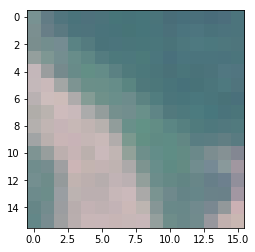

In [7]:
x = data["S2"][index:index+1,:,:,0:3]
x_visu = utils_visu.equalize_patch_hist(x, cdf_rgb)

plt.imshow(x_visu[0])

### Data-augmented samples:

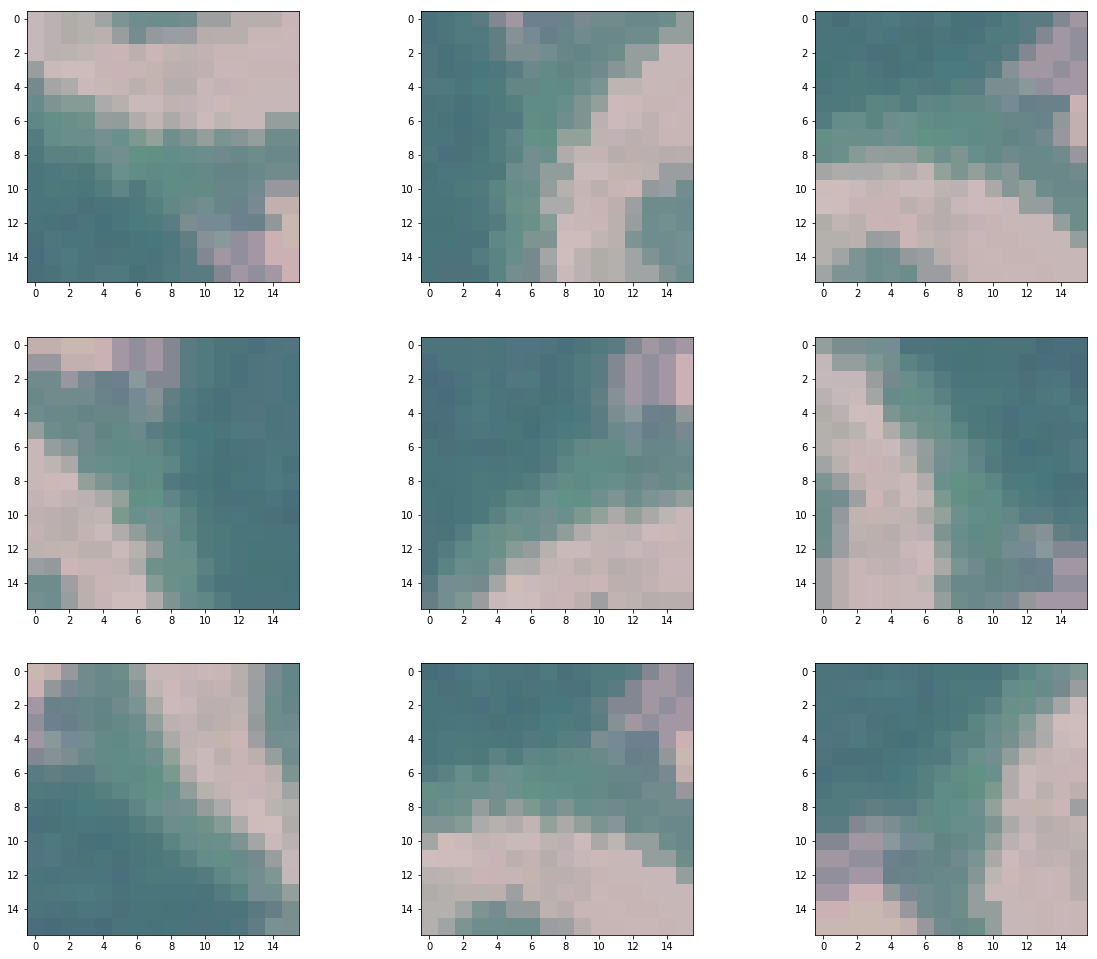

In [9]:
i = 0
fig = plt.figure(i, figsize=(20, 17))
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(330 + 1 + i)
    batch_visu = utils_visu.equalize_patch_hist(batch, cdf_rgb)
    plt.imshow(batch_visu[0])
    i += 1
    if i > 8:
        break 